<a href="https://colab.research.google.com/github/Christinathattil/AML/blob/Main/AML_LAB_1_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
df=pd.read_csv('/content/Program_1_Dataset.csv')
df.head(5)

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [15]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


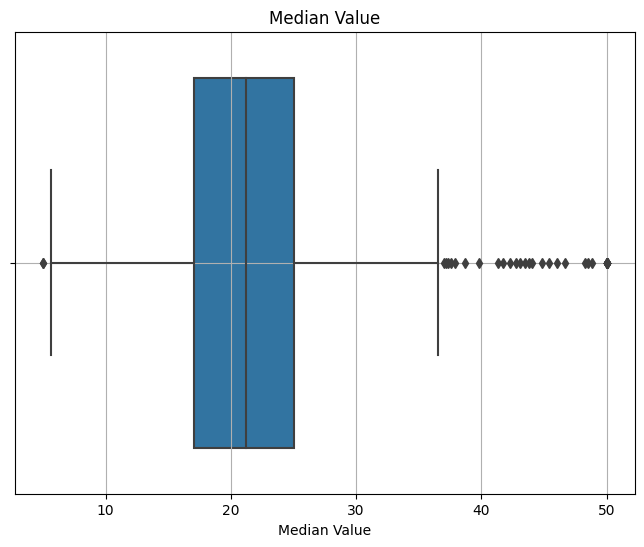

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['MValue'])
plt.title('Median Value')
plt.xlabel('Median Value')
plt.grid(True)
plt.show()

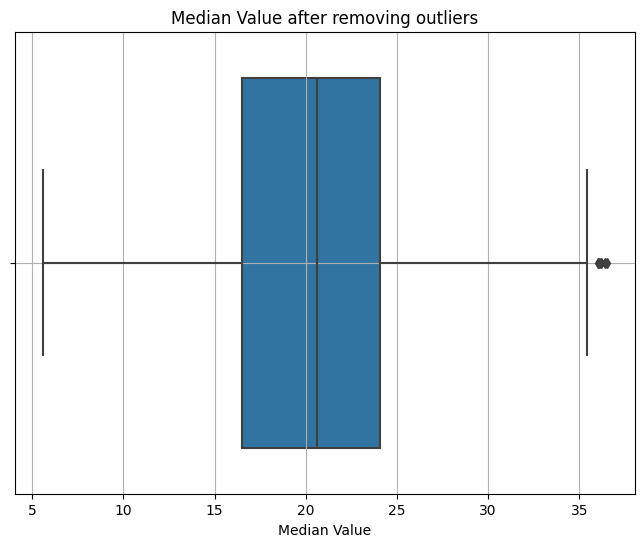

In [18]:
Q1 = df['MValue'].quantile(0.25)
Q3 = df['MValue'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['MValue'] >= Q1 - 1.5 * IQR) & (df['MValue'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(8,6))
sns.boxplot(x=df['MValue'])
plt.xlabel('Median Value')
plt.title("Median Value after removing outliers")
plt.grid()
plt.show()

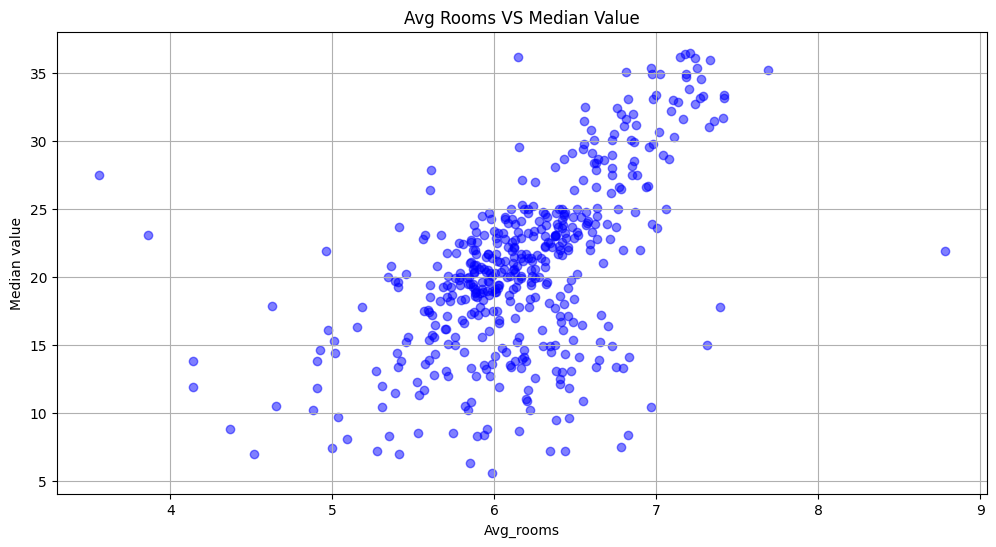

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(x=df['Avg_rooms '],y=df['MValue'],c='blue',alpha=0.5)
plt.title('Avg Rooms VS Median Value')
plt.xlabel('Avg_rooms')
plt.ylabel('Median value')
plt.grid(True)
plt.show()

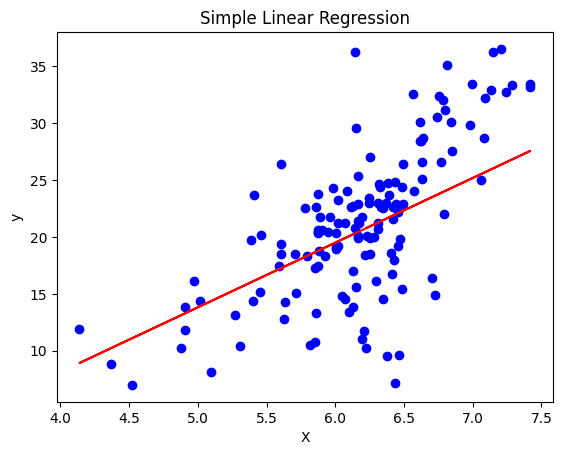

Coefficients: [5.67496403]
Intercept: -14.559660764685994


In [29]:
X=df[['Avg_rooms ']]
y=df['MValue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')  # Scatter plot of the test data
plt.plot(X_test, y_pred, color='red')     # Regression line
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

In [30]:
# Calculating Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculating R-squared (R2)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Printing the results
print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on testing set:", mse_test)
print("R-squared (R2) score on training set:", r2_train)
print("R-squared (R2) score on testing set:", r2_test)

Mean Squared Error (MSE) on training set: 29.224445875256233
Mean Squared Error (MSE) on testing set: 26.118995510221943
R-squared (R2) score on training set: 0.26624952841755545
R-squared (R2) score on testing set: 0.42252665157771063
